In [ ]:
from keras.datasets import mnist
from numpy import reshape
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [ ]:
from matplotlib.pyplot import imshow

In [ ]:
train_labels[1]

In [ ]:
imshow(train_images[0])

In [ ]:
train_images.shape

In [ ]:
train_labels

In [ ]:
from keras import models
from keras import layers

# Softmax outputs the probablity of each target 

In [ ]:
network = models.Sequential()           #Dense hidden layers phali layer ka har neuron apni samnay wali kay har nerurons say connect hoga
network.add(layers.Dense(512,activation='relu',input_shape=(28 * 28,)))#Edges pai wights generates hoty hain
network.add(layers.Dense(10, activation='softmax')) #bias means phalay say koi value majud ho jis say output vary kary har node apna bias hota hai
#activitaion function converts linear to non-linear

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [ ]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

In [ ]:
print(test_acc*100)
print(test_loss*100)

In [ ]:
train_images[0]

In [ ]:
# Ordinal Data --> Number ki form mai can be sorted , 
# Nominal Data --> Non-Numeric Data , can't be sorted

# Chapter 3 (3 new examples)

In [1]:
#Objective Function->Loss should be minimized #Extremly Important for Objective Func
#Best Practises hamay malum hota hai konsa loss funciton is for which type of problem

In [3]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
#During training the ANN will try to predict the data without seeing the label of the data,
#Training can be 100% testing not,100% not reliable,
#TemporalLeak Some part of data memorized.
#Encoding --> Vectorization,

In [5]:
max([max(sequence for sequence in train_data)])

[1,
 9995,
 2,
 7,
 2208,
 7335,
 3135,
 4173,
 3783,
 509,
 1683,
 4702,
 2,
 2,
 6,
 201,
 7,
 6415,
 687,
 2,
 2,
 7,
 6387,
 548,
 139,
 7583,
 295,
 34,
 4485,
 5302,
 2,
 2,
 2,
 7,
 2,
 2,
 146,
 24,
 1017,
 2282,
 133,
 21,
 4,
 1591,
 3113,
 786,
 2,
 16,
 125,
 4,
 2,
 9790,
 2039,
 137,
 267,
 2,
 5,
 2,
 120,
 2024,
 980,
 2,
 1248,
 5666,
 727,
 1405,
 6879,
 1060,
 6442,
 18,
 2,
 1461,
 2,
 1883,
 445,
 109,
 5369,
 3696,
 33,
 236,
 786,
 5580,
 7994,
 8,
 2,
 2,
 103,
 2,
 98,
 11,
 2,
 1461,
 24,
 66,
 351,
 1461,
 165,
 116,
 17,
 2545,
 18,
 6717,
 8694,
 5514,
 980,
 2545,
 165,
 734,
 18,
 2311,
 52,
 84,
 157,
 18,
 7232,
 11,
 661,
 8,
 607,
 3531,
 223,
 1066,
 445,
 9236,
 996,
 8,
 2898,
 4931,
 8,
 5526,
 8316,
 7880,
 154,
 378,
 459,
 18,
 6942,
 632,
 5,
 79,
 2024,
 18,
 68,
 4918,
 813,
 2456,
 2,
 17,
 840,
 4807,
 3854,
 23,
 136,
 159,
 5770,
 852,
 1698,
 632,
 7708,
 7993,
 1003,
 1372,
 5747,
 2,
 7,
 5840,
 5408,
 11,
 7200,
 120,
 4682,
 7,
 2,


In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results


In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
x_train[1]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) #Sigmoid convert data to probablity but on binaray classificiation

In [16]:
#Validation Data_Validation Test during every testing epcohs validation accucracy and validation loss

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train=y_train[10000:]

In [12]:
#Validation can be helpful for network quality

In [13]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 249us/step - loss: 0.5106 - acc: 0.7927 - val_loss: 0.4100 - val_acc: 0.8384
Epoch 2/20
15000/15000 [==============================] - 3s 223us/step - loss: 0.3065 - acc: 0.9014 - val_loss: 0.3087 - val_acc: 0.8820
Epoch 3/20
15000/15000 [==============================] - 3s 215us/step - loss: 0.2238 - acc: 0.9281 - val_loss: 0.2947 - val_acc: 0.8805
Epoch 4/20
15000/15000 [==============================] - 3s 208us/step - loss: 0.1773 - acc: 0.9424 - val_loss: 0.2728 - val_acc: 0.8887
Epoch 5/20
15000/15000 [==============================] - 3s 204us/step - loss: 0.1457 - acc: 0.9537 - val_loss: 0.2886 - val_acc: 0.8833
Epoch 6/20
15000/15000 [==============================] - 3s 210us/step - loss: 0.1205 - acc: 0.9624 - val_loss: 0.3020 - val_acc: 0.8867
Epoch 7/20
15000/15000 [==============================] - 3s 207us/step - loss: 0.0988 - acc: 0.9709 - val_loss: 0.3169 - 

In [36]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

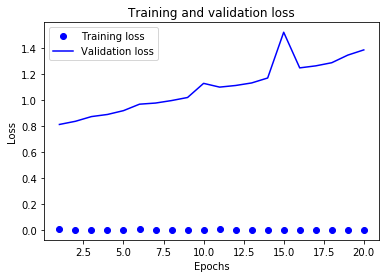

In [40]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['val_acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [46]:
bstr = '0000 0100 1000 1101'.replace(' ', '')
hstr = '%0*X' % ((len(bstr) + 3) // 4, int(bstr, 2))
hstr

'048D'